In [9]:
import fbprophet  as fb
import matplotlib as mt
import pandas     as pd
import datetime   as dt

In [10]:
# First load the data from the CSV file
data = pd.read_csv('moving_objects.csv')

data.head()

,id,x0,x1
0,0,0.013858,0.005740
1,1,0.040976,0.018570
2,2,0.080801,0.039523
3,3,0.132841,0.069387
4,4,0.196686,0.108742


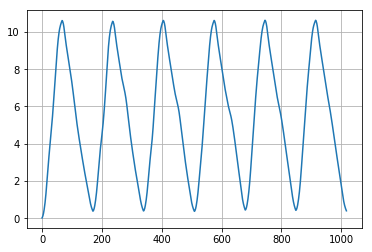

In [11]:
axis = 'x0'

mt.pyplot.clf()
mt.pyplot.plot(data['id'], data[axis])
mt.pyplot.grid()

In [12]:
now = dt.datetime.now()
def calculate_time(row):
    return now + dt.timedelta(hours=row['id'])

# Prepare the data for fbprophet. It requires 2 cols named 'ds' and 'y'
data['ds'] = data.apply(calculate_time, axis=1)
data['y']  = data[axis]

data.head()

,id,x0,x1,ds,y
0,0,0.013858,0.005740,2019-01-29 20:48:19.124024,0.013858
1,1,0.040976,0.018570,2019-01-29 21:48:19.124024,0.040976
2,2,0.080801,0.039523,2019-01-29 22:48:19.124024,0.080801
3,3,0.132841,0.069387,2019-01-29 23:48:19.124024,0.132841
4,4,0.196686,0.108742,2019-01-30 00:48:19.124024,0.196686


In [13]:
data[['ds', 'y']].head()

,ds,y
0,2019-01-29 20:48:19.124024,0.013858
1,2019-01-29 21:48:19.124024,0.040976
2,2019-01-29 22:48:19.124024,0.080801
3,2019-01-29 23:48:19.124024,0.132841
4,2019-01-30 00:48:19.124024,0.196686


In [14]:
# Now call fbprophet
prophet = fb.Prophet()
prophet.fit(data[['ds', 'y']])

# Make a future dataframe with 15 additional records to hold 15 predictions
forecast = prophet.make_future_dataframe(periods=15)
# and make predictions
forecast = prophet.predict(forecast)

forecast.head()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-29 20:48:19.124024,5.703774,0.665090,1.245733,5.703774,5.703774,-4.760689,-4.760689,-4.760689,0.016700,0.016700,0.016700,-4.777390,-4.777390,-4.777390,0.0,0.0,0.0,0.943085
1,2019-01-29 21:48:19.124024,5.719201,0.608703,1.193664,5.719201,5.719201,-4.806436,-4.806436,-4.806436,0.009414,0.009414,0.009414,-4.815850,-4.815850,-4.815850,0.0,0.0,0.0,0.912765
2,2019-01-29 22:48:19.124024,5.734629,0.602682,1.184756,5.734629,5.734629,-4.840854,-4.840854,-4.840854,0.004958,0.004958,0.004958,-4.845812,-4.845812,-4.845812,0.0,0.0,0.0,0.893775
3,2019-01-29 23:48:19.124024,5.750056,0.610700,1.155104,5.750056,5.750056,-4.864018,-4.864018,-4.864018,0.002998,0.002998,0.002998,-4.867016,-4.867016,-4.867016,0.0,0.0,0.0,0.886038
4,2019-01-30 00:48:19.124024,5.765484,0.584759,1.197804,5.765484,5.765484,-4.878489,-4.878489,-4.878489,0.000737,0.000737,0.000737,-4.879226,-4.879226,-4.879226,0.0,0.0,0.0,0.886995
5,2019-01-30 01:48:19.124024,5.780911,0.582943,1.176930,5.780911,5.780911,-4.886480,-4.886480,-4.886480,-0.004252,-0.004252,-0.004252,-4.882227,-4.882227,-4.882227,0.0,0.0,0.0,0.894431
6,2019-01-30 02:48:19.124024,5.796338,0.611174,1.194127,5.796338,5.796338,-4.887439,-4.887439,-4.887439,-0.011610,-0.011610,-0.011610,-4.875829,-4.875829,-4.875829,0.0,0.0,0.0,0.908899
7,2019-01-30 03:48:19.124024,5.811766,0.636283,1.216440,5.811766,5.811766,-4.878238,-4.878238,-4.878238,-0.018373,-0.018373,-0.018373,-4.859865,-4.859865,-4.859865,0.0,0.0,0.0,0.933528
8,2019-01-30 04:48:19.124024,5.827193,0.657196,1.257992,5.827193,5.827193,-4.855709,-4.855709,-4.855709,-0.021514,-0.021514,-0.021514,-4.834195,-4.834195,-4.834195,0.0,0.0,0.0,0.971484
9,2019-01-30 05:48:19.124024,5.842621,0.721582,1.318501,5.842621,5.842621,-4.819150,-4.819150,-4.819150,-0.020444,-0.020444,-0.020444,-4.798706,-4.798706,-4.798706,0.0,0.0,0.0,1.023471


In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-29 20:48:19.124024,0.943085,0.665090,1.245733
1,2019-01-29 21:48:19.124024,0.912765,0.608703,1.193664
2,2019-01-29 22:48:19.124024,0.893775,0.602682,1.184756
3,2019-01-29 23:48:19.124024,0.886038,0.610700,1.155104
4,2019-01-30 00:48:19.124024,0.886995,0.584759,1.197804
5,2019-01-30 01:48:19.124024,0.894431,0.582943,1.176930
6,2019-01-30 02:48:19.124024,0.908899,0.611174,1.194127
7,2019-01-30 03:48:19.124024,0.933528,0.636283,1.216440
8,2019-01-30 04:48:19.124024,0.971484,0.657196,1.257992
9,2019-01-30 05:48:19.124024,1.023471,0.721582,1.318501


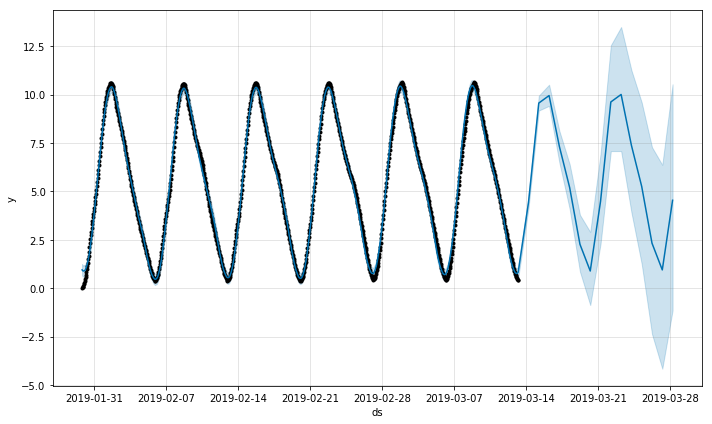

In [16]:
fig = prophet.plot(forecast)